## Attributes
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Rudra Pratap Patel\Downloads\hour.csv.zip')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
df.shape

(17379, 17)

- In the Bike sharing dataset , observations are 17379 and columns are 17. 

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Here we observe that dteday column is date&time variable and remainings are numerical.

# EDA

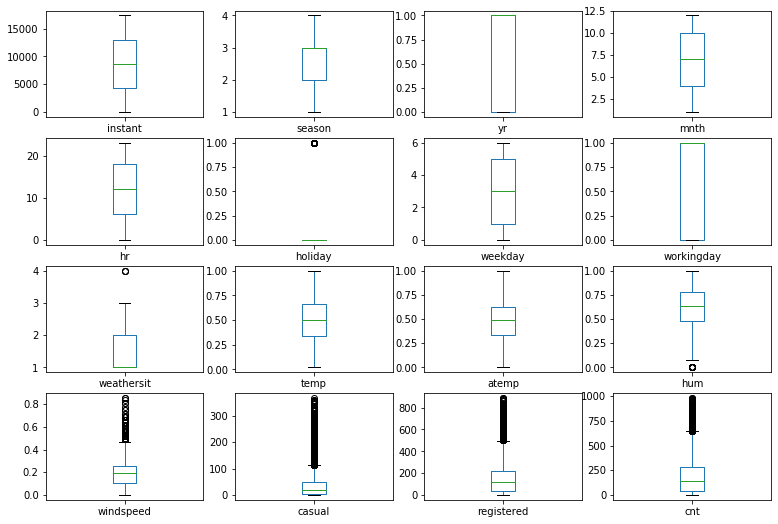

In [8]:
df.plot(kind = 'box', subplots = True ,layout = (4,4),figsize = (13,9),sharex = False , sharey= False)
plt.show()

- this type of plot shows that a lot of outliers present in the dataset which columns are - windspeed , casual,registered,cnt,
  weathersit,hum

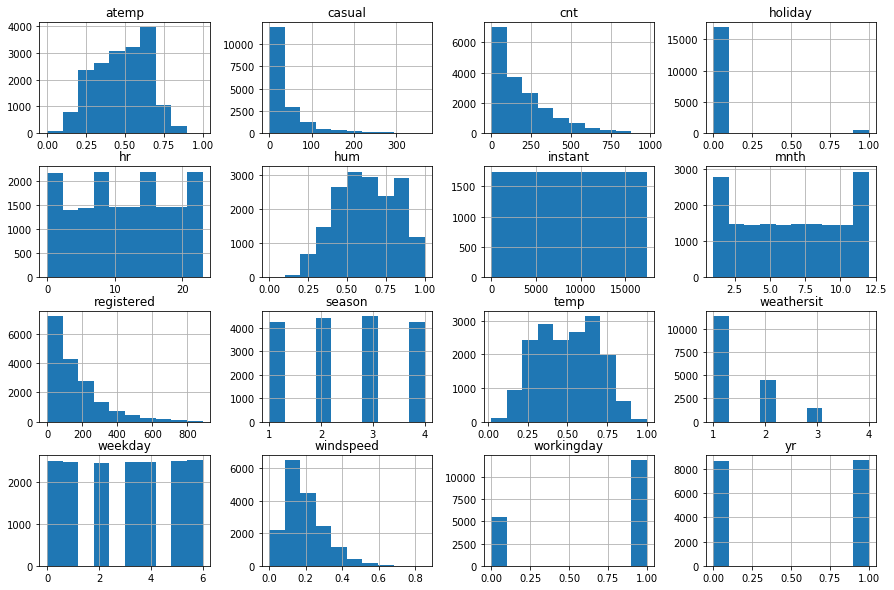

In [9]:
df.hist(figsize = (15,10))
plt.show()

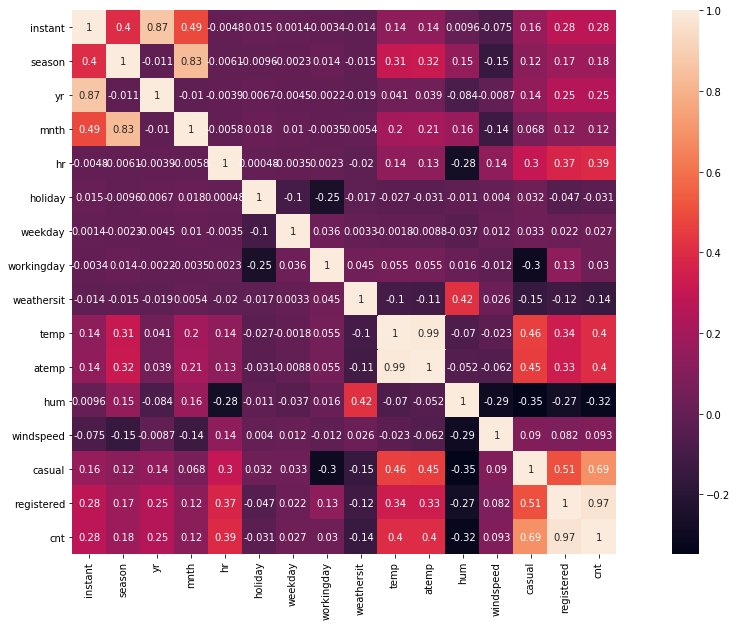

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), square = True , annot = True)
plt.show()

- Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system,  We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information


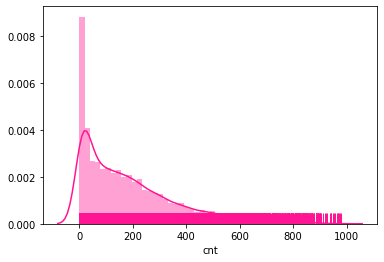

In [11]:
sns.distplot(df['cnt'],rug = True,color = 'deeppink')
plt.show()

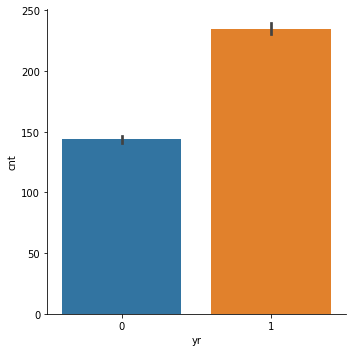

In [12]:
sns.factorplot(x = 'yr', y = 'cnt' ,kind = 'bar', data = df)
plt.show()

- here we observe that in year 2011 the total counts are less than year 2012.maximum counts : casual and registered in 2012.

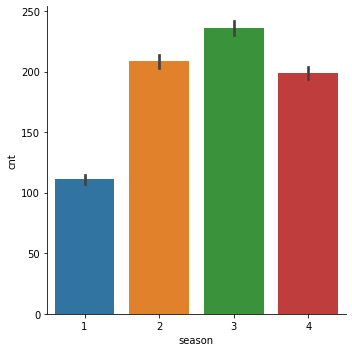

In [13]:
sns.factorplot(x = 'season', y = 'cnt' ,kind = 'bar', data = df)
plt.show()

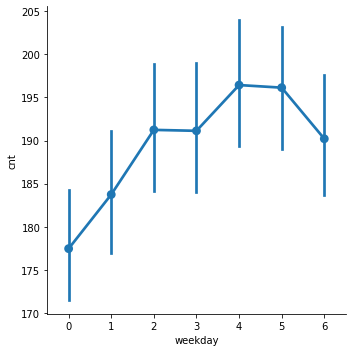

In [14]:
sns.factorplot(x = 'weekday', y = 'cnt' ,kind = 'point', data = df)
plt.show()

- This plot shows that in day1 there is minimum counts and then increases till day2 and then remaining constant in day3 then increases counts in day4 then partially decreases in day5 and the counts decreases in day6.

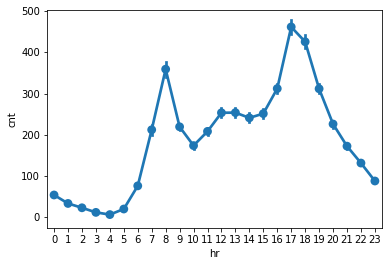

In [15]:
sns.pointplot(x = 'hr', y = 'cnt' , data = df)

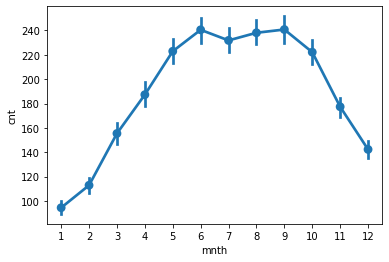

In [16]:
sns.pointplot(x = 'mnth', y = 'cnt' , data = df)

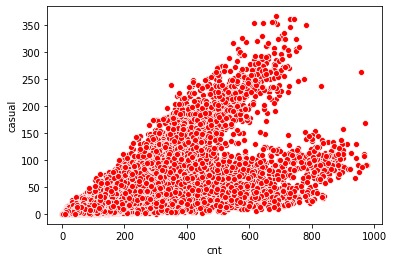

In [17]:
sns.scatterplot(x = 'cnt' , y = 'casual' , data = df,color = 'r')
plt.show()

# Checking missing values

In [18]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- there is no missing value in the dataset

# Droping Irrelevant Columns

In [19]:
df.drop(['holiday'] , axis = 1 , inplace = True)

In [20]:
df

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["dteday"] = le.fit_transform(df["dteday"])
df["dteday"].head()


0    0
1    0
2    0
3    0
4    0
Name: dteday, dtype: int32

# Model Building:

## convert the data into dependent and independent variables

In [22]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13034, 15)
(4345, 15)
(13034,)
(4345,)


In [25]:
X_train

array([[7.2410e+03, 3.0600e+02, 4.0000e+00, ..., 8.9600e-02, 1.2000e+01,
        2.8000e+02],
       [1.4030e+03, 6.1000e+01, 1.0000e+00, ..., 0.0000e+00, 1.7000e+01,
        1.8500e+02],
       [1.2148e+04, 5.1100e+02, 2.0000e+00, ..., 1.3430e-01, 3.8000e+01,
        1.0300e+02],
       ...,
       [9.8460e+03, 4.1500e+02, 1.0000e+00, ..., 3.5820e-01, 0.0000e+00,
        6.0000e+00],
       [1.0800e+04, 4.5500e+02, 2.0000e+00, ..., 2.5370e-01, 1.4000e+01,
        5.5000e+01],
       [2.7330e+03, 1.1700e+02, 2.0000e+00, ..., 3.5820e-01, 4.4000e+01,
        4.8600e+02]])

In [26]:
y_train

7240     306
1402      61
12147    511
3368     144
15652    657
        ... 
9225     389
13123    552
9845     415
10799    455
2732     117
Name: dteday, Length: 13034, dtype: int32

In [27]:
X_test

array([[3.4400e+03, 1.4700e+02, 2.0000e+00, ..., 2.2390e-01, 4.0000e+00,
        3.0000e+00],
       [6.5430e+03, 2.7700e+02, 4.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        4.0000e+00],
       [1.5471e+04, 6.4900e+02, 4.0000e+00, ..., 1.3430e-01, 8.1000e+01,
        6.6200e+02],
       ...,
       [1.3880e+03, 6.1000e+01, 1.0000e+00, ..., 4.6270e-01, 1.0000e+00,
        2.0000e+00],
       [1.0791e+04, 4.5400e+02, 2.0000e+00, ..., 2.2390e-01, 9.3000e+01,
        5.1300e+02],
       [1.0134e+04, 4.2700e+02, 1.0000e+00, ..., 1.3430e-01, 2.0000e+00,
        1.4000e+01]])

In [28]:
y_test

3439     147
6542     277
15470    649
9851     415
12640    531
        ... 
13245    557
3310     141
1387      61
10790    454
10133    427
Name: dteday, Length: 4345, dtype: int32

## Model building using LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr.score(X_test , y_test)

1.0